# Análise de Dados e Tratamento de Valores Ausentes: Variável Age

# Sumário

1. Introdução
2. Análise exploratória dos dados

# 1. Introdução

Este projeto realiza uma análise exploratória em um dataset disponível no endereço https://www.kaggle.com/competitions/titanic/data, que contém informações detalhadas sobre cada indivíduo, como idade, gênero, classe de viagem, tarifa paga e sobrevivência. O objetivo principal aqui é explorar e aplicar técnicas de tratamento de valores ausentes, focando na variável "Age".

Valores ausentes podem influenciar negativamente modelos e análises, especialmente quando presentes em variáveis chave. Neste contexto, investigaremos a natureza dos valores ausentes em "Age" e aplicaremos uma estratégia de preenchimento para tornar os dados completos e consistentes. Serão apresentados passos como a análise do padrão de ausência dos dados e a seleção do melhor método de imputação com base em características de outras variáveis, como classe de viagem e gênero.

Este notebook está estruturado para facilitar o aprendizado e a aplicação prática de técnicas de tratamento de dados ausentes, com ênfase em etapas de análise, decisão e execução de uma abordagem adequada para valores faltantes em variáveis numéricas.

# 2. Análise exploratória dos dados

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando o dataset
df = pd.read_csv('train.csv')

## Entendendo o dataset

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dicionário das variáveis

- PassengerId: ID do passageiro

- Survived: Sobrevivente (0: não, 1: sim)

- Pclass: Classe do bilhete (1: primeira, 2: segunda, 3: terceira)
	
- Name: Nome

- Sex: gênero

- Age: idade (em anos)

- SibSp: Número de irmãos/cônjuges a bordo do Titanic

- Parch: Número de pais/crianças a bordo

- Ticket: Número do bilhete

- Fare: Tarifa de passageiro

- Cabin: Número da cabine

- Embarked: Ponto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
# verificando a soma de valores ausentes em cada coluna
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Verificamos que há duas variáveis com valores ausentes: <i>Age</i> e <i>Cabin</i>, mas neste notebook, vamos fazer o tratamento apenas da variável <i>Age</i>.

## Tratamento de valores ausentes da Coluna 'Age'

Para decidir como tratar os valores ausentes dessa coluna, vamos realizar algumas análises.

In [6]:
# verificando o tamanho da coluna 'Age'
len(df['Age'])

891

É importante entender qual tipo de dado faltante se encaixa neste caso. 

* <b>Verificação para MCAR (Missing Completely at Random)</b>

<u>Definição de MCAR</u>: Os dados ausentes não têm nenhuma relação com as outras variáveis ou com a própria variável. A ausência ocorre de forma completamente aleatória.
Exemplo: Um sensor falha aleatoriamente em capturar uma leitura de temperatura.

Uma abordagem exploratória é verificar a distribuição de outras variáveis para verificar se elas mudam quando os dados de Age estão ausentes. 

In [7]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


* Vamos verificar se existe uma relação entre idade faltante com a variável Pclass (classe do bilhete)

In [5]:
# Extraindo as colunas nas quais a variável Age possui valores nulos
class_age_sex_df = df[df['Age'].isnull() == True][['Pclass', 'Age', 'Sex']]
class_age_sex_df.head()

,Pclass,Age,Sex
5,3,NaN,male
17,2,NaN,male
19,3,NaN,female
26,3,NaN,male
28,3,NaN,female


In [6]:
# verificando quantas linhas de valores nulos de idade a variável Pclass possui para cada categoria de bilhete
nan_counts_class = class_age_sex_df.groupby('Pclass').size()
nan_counts_class

Pclass
1     30
2     11
3    136
dtype: int64

Vamos entender resultado obtido na linha de código anterior:

* Há 30 valores ausentes de idade para bilhetes da classe 1

* Há 11 valores ausentes de idade para bilhetes da classe 2

* Há 136 valores ausentes de idade para bilhetes da classe 3

Ou seja, há mais valores ausentes de idade para bilhetes da classe 3

Vamos visualizar a partir de um gráfico de barras essas estatísticas:

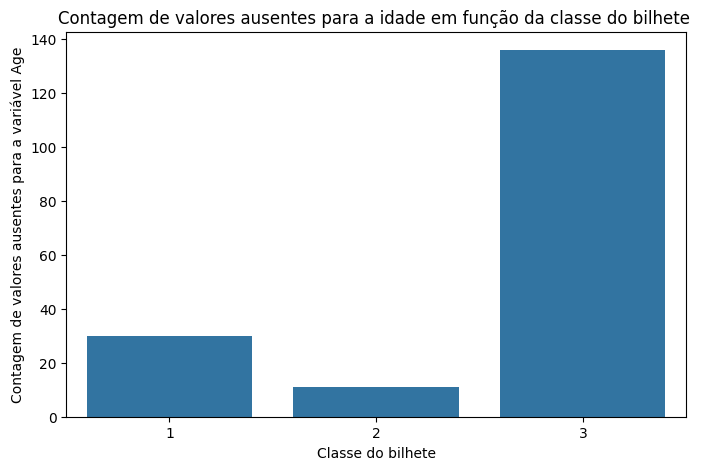

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x=nan_counts_class.index, y=nan_counts_class.values)
plt.xlabel('Classe do bilhete')
plt.ylabel('Contagem de valores ausentes para a variável Age')
plt.title('Contagem de valores ausentes para a idade em função da classe do bilhete ')
plt.show()

A partir dos resultados acima, podemos verificar que os dados faltantes de idade não são completamente ao acaso (MCAR), pois aparentemente há uma relação com a classe do bilhete, dado que pessoas da 3ª classe são as que possuem mais dados faltantes de idade.

* <b>Verificação para MAR (Missing at Random)</b>

<u>Definição de MAR</u>: A ausência dos dados pode ser explicada por outras variáveis no dataset, mas não pela própria variável. Isso significa que a ausência de valores da variável Age pode estar relacionada, por exemplo, ao gênero ou à classe social de uma pessoa, mas não à idade dela em si.
Exemplo: Pessoas de uma certa faixa de renda tendem a omitir sua idade.

Podemos assumir que os dados faltantes da variável 'Age' são do tipo MAR, pois há uma relação com os dados observados de classe do bilhete (Pclass). Uma solução para lidar com os valores faltantes deste tipo é a imputação pela média ou mediada. Para decidir se escolhemos a média ou mediana, vamos verificar o tipo de distribuição da variável 'Age'.

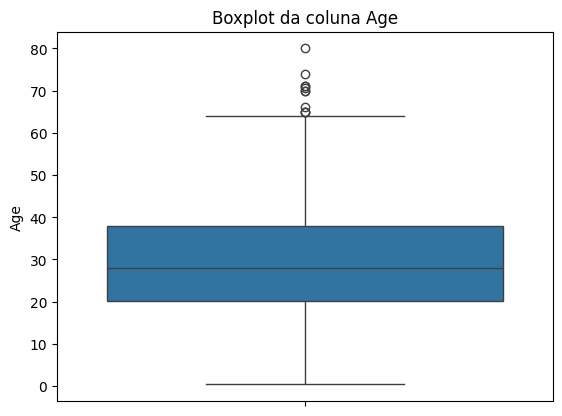

In [16]:
sns.boxplot(data=df['Age'])
plt.title('Boxplot da coluna Age')
plt.show()

[]

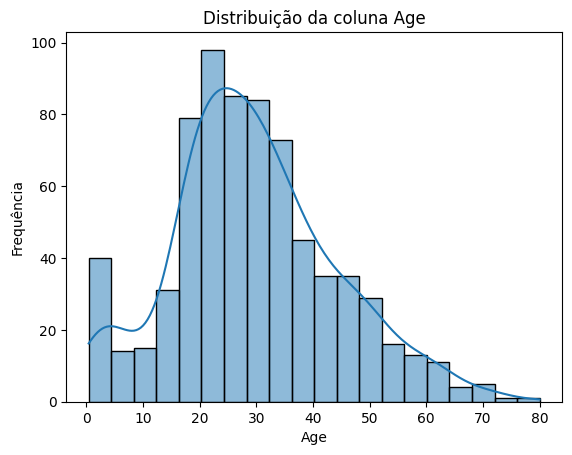

In [17]:
# verificando a distribuição das idades
sns.histplot(df['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.title('Distribuição da coluna Age')
plt.plot()

Verificamos que a distribuição de idades não é simétrica, possuindo uma leve calda para a direita. Neste caso, a mediana é mais eficaz, pois ela é menos afetada do que a média por valores extremos. Vamos então preencher os valores faltantes da idade com a mediana.

Uma alternativa para preencher os valores ausentes de idade é calcular a mediana da idade para cada uma das 3 classes de bilhete e imputá-la.

In [7]:
# criando cópia do dataset original
df_copia = df.copy()

In [9]:
# calculando a mediana para cada subgrupo e imputando onde houver NaN
df_copia['Age'] = (
    df_copia.groupby('Pclass')['Age']
    .apply(lambda x: x.fillna(x.median()))
    .reset_index(drop=True)
)

df_copia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,35.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,58.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,40.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,65.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,NaN,S


Agora vamos criar histogramas e boxplots para verificar como a imputação da mediana de cada classe nos valores ausentes influenciou a distribuição dos dados.

[]

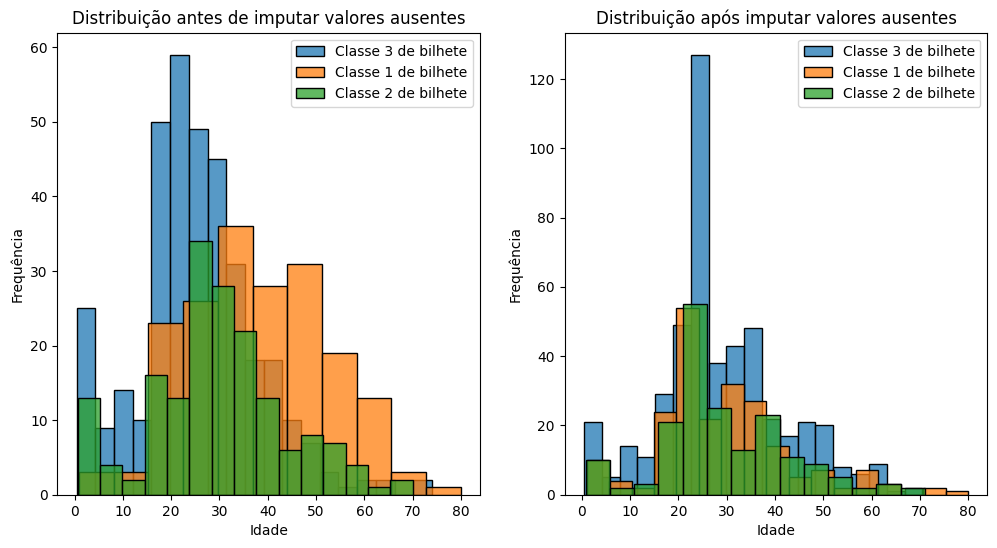

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plotando o primeiro gráfico

# Histogramas das classes de bilhete antes de fazer a imputação na coluna Age
sns.histplot(data=df[df['Pclass'] == 3]['Age'], label='Classe 3 de bilhete', ax=axs[0], kde=False)
sns.histplot(data=df[df['Pclass'] == 1]['Age'], label='Classe 1 de bilhete', ax=axs[0], kde=False)
sns.histplot(data=df[df['Pclass'] == 2]['Age'], label='Classe 2 de bilhete', ax=axs[0], kde=False)

# Configurações do gráfico de histogramas
axs[0].set_title('Distribuição antes de imputar valores ausentes')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Frequência')

# Histogramas das classes de bilhete após de fazer a imputação na coluna Age
sns.histplot(data=df_copia[df_copia['Pclass'] == 3]['Age'], label='Classe 3 de bilhete', ax=axs[1], kde=False)
sns.histplot(data=df_copia[df_copia['Pclass'] == 1]['Age'], label='Classe 1 de bilhete', ax=axs[1], kde=False)
sns.histplot(data=df_copia[df_copia['Pclass'] == 2]['Age'], label='Classe 2 de bilhete', ax=axs[1], kde=False)

# Configurações do gráfico de histogramas
axs[1].set_title('Distribuição após imputar valores ausentes')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Frequência')

axs[0].legend()
axs[1].legend()
plt.plot()

Vamos verificar as medidas de tendência central antes e após fazer a imputação de valores ausentes na coluna Age

In [24]:
# Antes de realizar o tratamento de valores ausentes
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
# Após realizar o tratamento de valores ausentes
df_copia['Age'].describe()

count    891.000000
mean      29.066409
std       13.244532
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

Agora vamos construir boxplots para verificar como a imputação de valores ausentes na coluna Age afetou a distribuição

[]

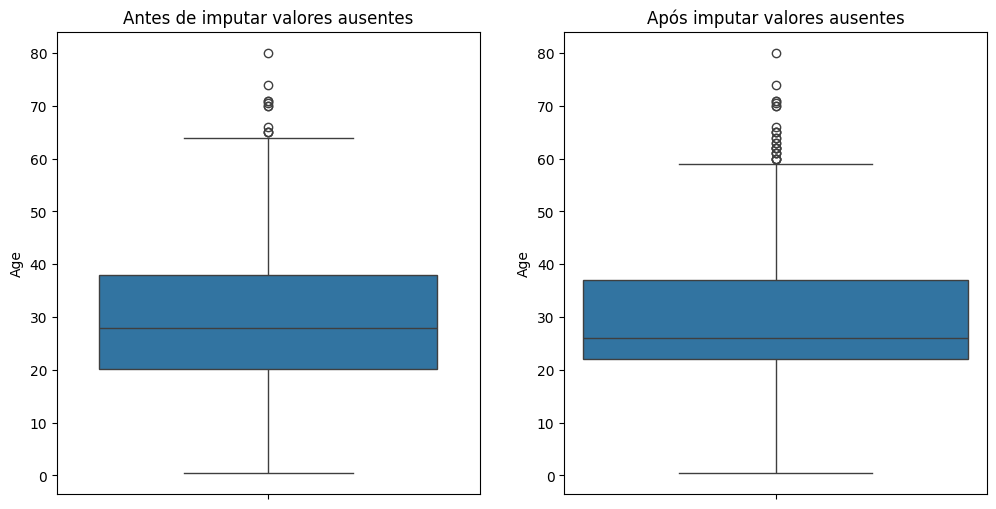

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df['Age'], ax=axs[0])
axs[0].set_title('Antes de imputar valores ausentes')

sns.boxplot(y=df_copia['Age'], ax=axs[1])
axs[1].set_title('Após imputar valores ausentes')

plt.plot()